In [11]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import arima

import warnings
warnings.filterwarnings("ignore")

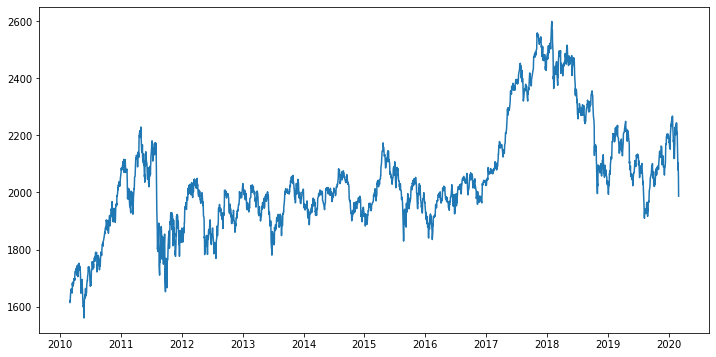

In [229]:
# kospi_df 만들고 시각화 해보기(2013~2020)
Kospi_df = fdr.DataReader('KS11', '2010-03-01', '2020-02-28')
plt.figure(figsize=(12,6), facecolor='w')
plt.plot(Kospi_df['Close'])
Kospi_c = Kospi_df['Close']
Kospi_df_c = pd.DataFrame(Kospi_c)

In [209]:
Kospi_df_c

,Close
Date,
2010-03-02,1615.12
2010-03-03,1622.44
2010-03-04,1618.20
2010-03-05,1634.57
2010-03-08,1660.04
...,...
2020-02-24,2079.04
2020-02-25,2103.61
2020-02-26,2076.77


In [41]:
kpss_diffs = arima.ndiffs(Kospi_df_c, alpha=0.05, test='kpss', max_d=5)
adf_diffs = arima.ndiffs(Kospi_df_c, alpha=0.05, test='adf', max_d=5)
pp_diffs = arima.ndiffs(Kospi_df_c, alpha=0.05, test='pp', max_d=5)
n_diffs = max(kpss_diffs,adf_diffs,pp_diffs)

print(f'적정 차분 차수는 {n_diffs}')

적정 차분 차수는 1


In [42]:
model = arima.auto_arima(y=Kospi_df_c, d=1, start_p=0, max_p=3, start_q=0, max_q=3, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21408.385, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21408.825, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21408.881, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21406.548, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21410.387, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.857 seconds


In [55]:
# 비교군 데이터 생성 및 확인
Kospi_df_last10day = fdr.DataReader('KS11', '2020-02-24', '2020-03-7')
Kospi_last10day_c =  Kospi_df_last10day['Close']
Kospi_df_last10day_c = pd.DataFrame(Kospi_last10day_c)
Kospi_df_last10day_c

,Close
Date,
2020-02-24,2079.04
2020-02-25,2103.61
2020-02-26,2076.77
2020-02-27,2054.89
2020-02-28,1987.01
2020-03-02,2002.51
2020-03-03,2014.15
2020-03-04,2059.33
2020-03-05,2085.26


In [74]:
# 이평선 생성 5MA   
Kospi_df_last10day_c['5MA'] = Kospi_df_last10day_c['Close']
Kospi_df_last10day_c['5MA'] = Kospi_df_c['Close'].rolling(5).mean().shift(1)
Kospi_df_last10day_c['5MA'][-5:] = Kospi_df_last10day_c['Close'].rolling(5).mean().shift(1)[-5:]
Kospi_df_last10day_c

,Close,5MA
Date,,
2020-02-24,2079.04,2203.946
2020-02-25,2103.61,2171.320
2020-02-26,2076.77,2150.266
2020-02-27,2054.89,2123.552
2020-02-28,1987.01,2095.430
2020-03-02,2002.51,2060.264
2020-03-03,2014.15,2044.958
2020-03-04,2059.33,2027.066
2020-03-05,2085.26,2023.578


In [75]:
# ARIMA Model 적용 (p,i,q)=(1,1,1)
model = ARIMA(Kospi_df_c,order = (1,1,1))
model_fit = model.fit()
forecast_data = model_fit.forecast(steps=5) # 마지막 5일의 예측 데이터 

In [76]:
# Arima 모델을 이용해 예측한 값과 실제 값 비교해보기
Kospi_df_last10day_c['Pred'] = Kospi_df_last10day_c['Close']
Kospi_df_last10day_c['Pred'][5:] = forecast_data.round(2)
Kospi_df_last10day_c

,Close,5MA,Pred
Date,,,
2020-02-24,2079.04,2203.946,2079.04
2020-02-25,2103.61,2171.320,2103.61
2020-02-26,2076.77,2150.266,2076.77
2020-02-27,2054.89,2123.552,2054.89
2020-02-28,1987.01,2095.430,1987.01
2020-03-02,2002.51,2060.264,1984.93
2020-03-03,2014.15,2044.958,1984.26
2020-03-04,2059.33,2027.066,1984.04
2020-03-05,2085.26,2023.578,1983.98


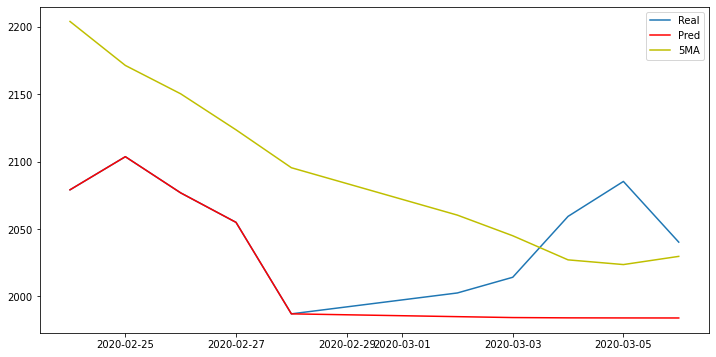

In [80]:
# 실제값과 예측값 그래프 비교
plt.figure(figsize=(12,6), facecolor='w')
plt.plot(Kospi_df_last10day_c['Close'], label = 'Real')
plt.plot(Kospi_df_last10day_c['Pred'], color = 'r', label = 'Pred')
plt.plot(Kospi_df_last10day_c['5MA'], color = 'y', label = '5MA')
plt.legend()

# plt.savefig('Real_Pred_5MA.png')

In [ ]:
# 생각보다 그래프가 많이 별론데...

# 삼전, 현차, naver, sk하닉 분석해보기

In [173]:
kospi_dt = pd.DataFrame(fdr.StockListing('KOSPI'))
kospi_dt.to_csv('./KOSPIDATA.csv')

In [178]:
kospi_dt[kospi_dt['Name'] == '현대차']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7657,005380,KOSPI,현대차,자동차용 엔진 및 자동차 제조업,"자동차(승용차,버스,트럭,특장차),자동차부품,자동차전착도료 제조,차량정비사업",1974-06-28,12월,"정의선, 장재훈, 이동석(각자 대표이사)",http://www.hyundai.com,서울특별시


In [188]:
dt_name = ['삼성전자', 'SK하이닉스', 'NAVER', '현대차']
dt_symbol = ['005930', '000660', '035420', '005380']

In [192]:
dt_df = pd.DataFrame(data=dt_symbol,index=dt_name, columns=['Symbol'])

In [195]:
dt_df

,Symbol
삼성전자,005930
SK하이닉스,000660
NAVER,035420
현대차,005380


In [251]:
# kospi_df 만들고 시각화 해보기(2013~2020)
# kospi4 = []
df = pd.DataFrame(fdr.DataReader('005930', '2010-03-01', '2020-02-28')['Close'])
# df.drop('Close',inplace=True)
for i, col in enumerate(dt_df['Symbol']):
    # print(col)
    df[dt_df.index[i]] = pd.DataFrame(fdr.DataReader(col, '2010-03-01', '2020-02-28')['Close'])
    # print(fdr.DataReader(col, '2010-03-01', '2020-02-29')['Close'])

df.drop('Close',axis=1,inplace=True)
df

,삼성전자,SK하이닉스,NAVER,현대차
Date,,,,
2010-03-02,15400,21450,59170,113500
2010-03-03,15420,21850,57444,114500
2010-03-04,15220,22200,58072,114500
2010-03-05,15500,22500,58072,114500
2010-03-08,15720,22350,60112,115000
...,...,...,...,...
2020-02-24,56800,99500,184000,122500
2020-02-25,57900,98000,190500,122500
2020-02-26,56500,94600,187000,122500


In [254]:
for i,col in enumerate(dt_name):
    kpss_diffs = arima.ndiffs(df[col], alpha=0.05, test='kpss', max_d=5)
    adf_diffs = arima.ndiffs(df[col], alpha=0.05, test='adf', max_d=5)
    pp_diffs = arima.ndiffs(df[col], alpha=0.05, test='pp', max_d=5)
    n_diffs = max(kpss_diffs,adf_diffs,pp_diffs)

    print(f'{dt_name[i]}의 적정 차분 차수는 {n_diffs}')

삼성전자의 적정 차분 차수는 1
SK하이닉스의 적정 차분 차수는 1
NAVER의 적정 차분 차수는 1
현대차의 적정 차분 차수는 1


In [257]:
for i, col in enumerate(dt_name):
    model = arima.auto_arima(y=df[col], d=1, start_p=0, max_p=3, start_q=0, max_q=3, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38088.714, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38087.152, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38086.996, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38088.760, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38088.725, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38088.011, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38087.948, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=38086.868, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=38088.565, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=38087.984, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=38087.026, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=38083.176, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=38083.946, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=38083.746, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0

In [296]:
# 이평선과 비교군 데이터 생성 및 확인
df_last10day = pd.DataFrame(fdr.DataReader('005930', '2020-02-24', '2020-03-07')['Close'])

for i, col in enumerate(dt_df['Symbol']):
    # print(col)
    df_last10day[dt_df.index[i]] = pd.DataFrame(fdr.DataReader(col, '2020-02-24', '2020-03-07')['Close'])
    
df_last10day.drop('Close',axis=1,inplace=True)
# df_last10day

df_last10day_5ma = df_last10day.copy()

for i , col in enumerate(dt_df['Symbol']):
    df_last10day_5ma[dt_df.index[i]] = df[dt_df.index[i]].rolling(5).mean().shift(1)
    df_last10day_5ma[dt_df.index[i]][-5:] = df_last10day[dt_df.index[i]].rolling(5).mean().shift(1)[-5:]

print(df_last10day)
print(df_last10day_5ma)

             삼성전자  SK하이닉스   NAVER     현대차
Date                                     
2020-02-24  56800   99500  184000  122500
2020-02-25  57900   98000  190500  122500
2020-02-26  56500   94600  187000  122500
2020-02-27  55900   92800  182000  121000
2020-02-28  54200   87900  174000  115000
2020-03-02  55000   92100  175000  113500
2020-03-03  55400   92800  175000  112500
2020-03-04  57400   94300  178500  113000
2020-03-05  57800   94900  181000  114000
2020-03-06  56500   92600  179500  110500
               삼성전자    SK하이닉스     NAVER       현대차
Date                                             
2020-02-24  60140.0  103500.0  188800.0  131500.0
2020-02-25  59200.0  102400.0  187900.0  128900.0
2020-02-26  58820.0  101600.0  188700.0  126900.0
2020-02-27  58080.0   99820.0  188200.0  125100.0
2020-02-28  57260.0   97580.0  186600.0  123300.0
2020-03-02  56260.0   94560.0  183500.0  120700.0
2020-03-03  55900.0   93080.0  181700.0  118900.0
2020-03-04  55400.0   92040.0  178600.0  11690

In [300]:
list_arima = [[2,1,1],[1,1,0],[1,1,1],[0,1,0]]
df_last10day_pred = df_last10day.copy()
for i, col in enumerate(dt_name):
    # ARIMA Model 적용
    model = ARIMA(df[col],order = list_arima[i])
    model_fit = model.fit()
    forecast_data = model_fit.forecast(steps=5) # 마지막 5일의 예측 데이터
    # Arima 모델을 이용해 예측한 값 생성
    df_last10day_pred[col][5:] = forecast_data.round(2)
    df_last10day_pred

df_last10day_pred

,삼성전자,SK하이닉스,NAVER,현대차
Date,,,,
2020-02-24,56800.00,99500.00,184000.00,122500
2020-02-25,57900.00,98000.00,190500.00,122500
2020-02-26,56500.00,94600.00,187000.00,122500
2020-02-27,55900.00,92800.00,182000.00,121000
2020-02-28,54200.00,87900.00,174000.00,115000
2020-03-02,54233.81,88056.74,174920.08,115000
2020-03-03,54373.99,88051.73,175339.60,115000
2020-03-04,54488.01,88051.89,175530.89,115000
2020-03-05,54573.31,88051.88,175618.11,115000


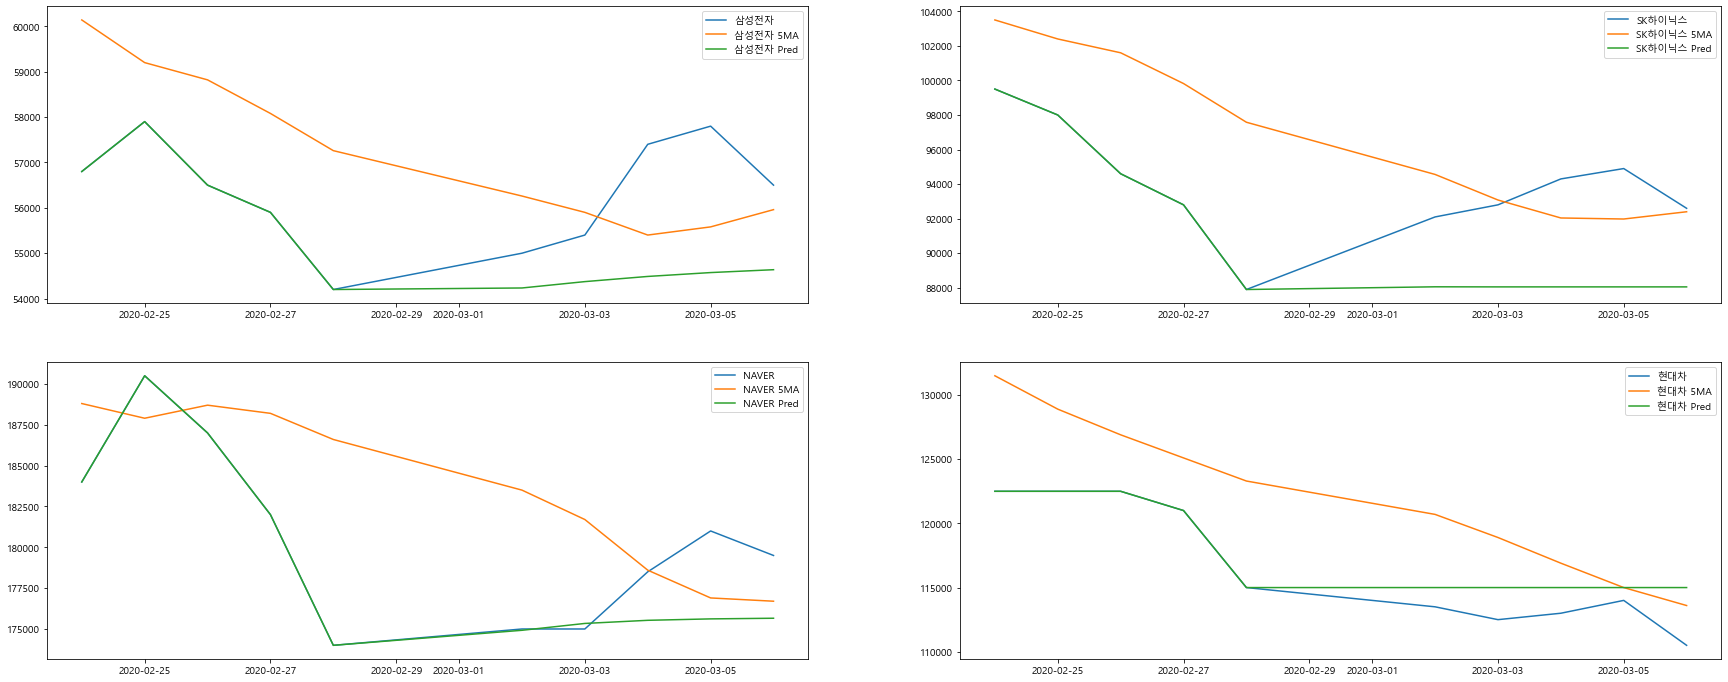

In [309]:
# plot하기

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(30,12), facecolor='w')

for i, col in enumerate(dt_name):
    plt.subplot(2, 2, i+1)
    plt.plot(df_last10day[col], label = col)
    plt.plot(df_last10day_5ma[col], label = ' '.join([col, '5MA']))
    plt.plot(df_last10day_pred[col], label = ' '.join([col, 'Pred']))
    plt.legend()

plt.savefig('./4rpma.png')